In [1]:
import scanpy as sc
import scvelo as scv
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
integrated = sc.read('data/integrated.h5ad')

In [3]:
org = sc.read('data/org_unintegrated_clusters.h5ad')
S3 = sc.read('data/S3_unintegrated_clusters.h5ad')
S3 = S3[~S3.obs.index.duplicated(keep='first')]

In [4]:
# rename clustering for both hPSC datasets
unint_cluster = [] 
for i in range(len(integrated)):
    idx = integrated.obs.index[i]
    if idx in org.obs.index.values:
        unint_cluster.append('hPSC organoids ' + str(org.obs.loc[idx].louvain))
    elif idx in S3.obs.index.values:
        unint_cluster.append('hPSC fetal lung cells ' + str(S3.obs.loc[idx].louvain))
    else:
        unint_cluster.append('Fetal lung epithelia')

integrated.obs['unint_cluster'] = np.array(unint_cluster).astype(str) 

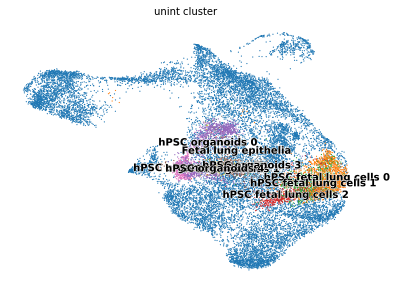

In [5]:
scv.pl.umap(integrated, color='unint_cluster')

saving figure to file figures/Integrated_umap.pdf


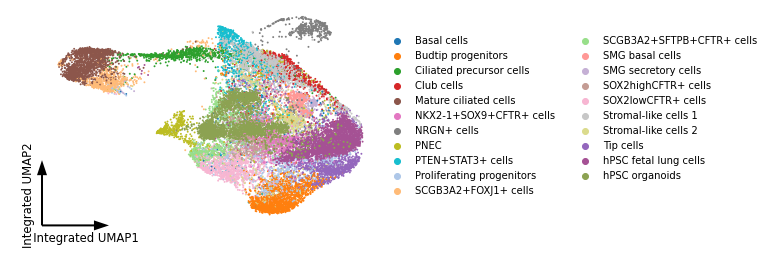

In [6]:
scv.pl.umap(integrated, color='cell_type', legend_loc='right',
           size=15, title='',fontsize=14,
            frameon='artist', xlabel='       Integrated UMAP1',ylabel='Integrated UMAP2',
           save='figures/Integrated_umap.pdf')

In [7]:
palette = {'Basal cells (19)': '#1f77b4',
 'Budtip progenitors (1)': '#ff7f0e',
 'Ciliated precursor cells (10)': '#2ca02c',
 'Club cells (16)': '#d62728',
 'Tip cells (4)': '#9467bd',
 'Mature ciliated cells (3)': '#8c564b',
 'NKX2-1+SOX9+CFTR+ cells (11)': '#e377c2',
 'NRGN+ cells (17)': '#7f7f7f',
 'PNEC (12)': '#bcbd22',
 'PTEN+STAT3+ cells (8)': '#17becf',
 'Proliferating progenitors (5)': '#aec7e8',
 'SCGB3A2+FOXJ1+ cells (13)': '#ffbb78',
 'SCGB3A2+SFTPB+CFTR+ cells (9)': '#98df8a',
 'SMG basal cells (15)': '#ff9896',
 'SMG secretory cells (18)': '#c5b0d5',
 'SOX2highCFTR+ cells (7)': '#c49c94',
 'SOX2lowCFTR+ cells (6)': '#f7b6d2',
 'Stromal-like cells 1 (2)': '#c7c7c7',
 'Stromal-like cells 2 (14)': '#dbdb8d',
 'hPSC fetal lung cells (20)': '#a55194',
 'hPSC organoids (21)': '#8ca252'}

saving figure to file figures/Integrated_umap_numbered.pdf


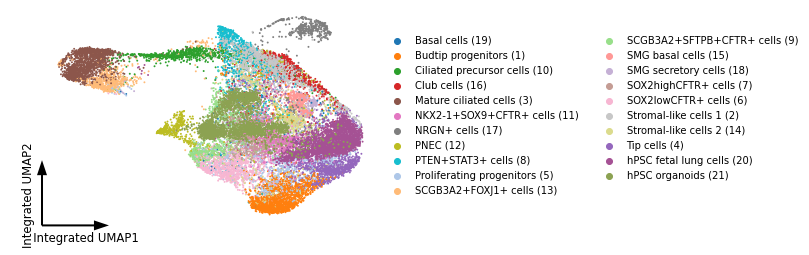

In [8]:
scv.pl.umap(integrated, color='cell_type_num', legend_loc='right',
           size=15, title='',fontsize=14,
            frameon='artist', xlabel='       Integrated UMAP1',ylabel='Integrated UMAP2',
           save='figures/Integrated_umap_numbered.pdf', palette = palette)

saving figure to file figures/Integrated_umap_labels.pdf


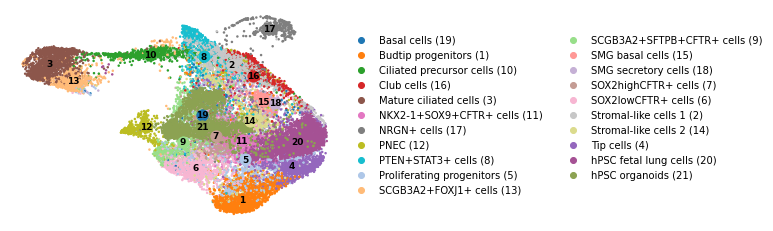

In [9]:
fig,ax=plt.subplots()

for i,ct in enumerate(integrated.obs.cell_type_num.cat.categories):
    X_emb = np.array(integrated[integrated.obs['cell_type_num']==ct].obsm['X_umap'])
    x_pos, y_pos = np.median(X_emb, axis=0) #
    plt.scatter(x_pos, y_pos, s=125, color=palette[ct])
    label = ct[-4:].split('(')[1].split(')')[0]
    ax.text(x_pos, y_pos, str(label), zorder=10000, horizontalalignment='center', 
                verticalalignment='center',fontweight='bold',fontsize=9)
scv.pl.umap(integrated, color='cell_type_num', ax=ax, legend_loc='right',title='', 
            rasterized=True,
            size=25, save='figures/Integrated_umap_labels.pdf')
plt.show()

In [10]:
dataset = []
for i in range(integrated.shape[0]):
    if integrated[i].obs.cell_type.values[0] == 'hPSC organoids':
        dataset.append('hPSC organoids')
    elif integrated[i].obs.cell_type.values[0] == 'hPSC fetal lung cells':
        dataset.append('hPSC fetal lung cells')
    else:
        dataset.append('Fetal lung epithelia')
integrated.obs['dataset'] = dataset

saving figure to file figures/Integrated_umap_hPSC_label.pdf


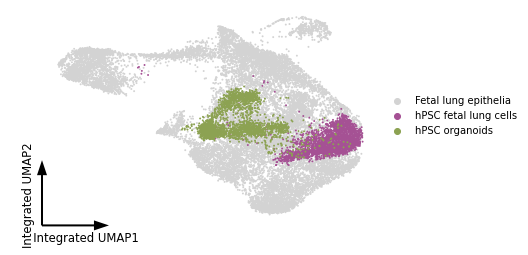

In [11]:
dataset_palette = {'Fetal lung epithelia':'#D3D3D3','hPSC fetal lung cells':'#a55194', 'hPSC organoids': '#8ca252'}
scv.pl.umap(integrated, color='dataset', legend_loc='right',
           palette=dataset_palette, size=15, title='',fontsize=14,
            frameon='artist', xlabel='       Integrated UMAP1',ylabel='Integrated UMAP2',
           save='figures/Integrated_umap_hPSC_label.pdf')

In [12]:
# relabel clustering
louvain = []
for i in range(len(org)):
    louvain.append('hPSC organoids ' + str(org.obs.iloc[i].louvain))
org.obs['louvain'] = louvain
org.obs['louvain'] = org.obs.louvain.astype('category')

louvain = []
for i in range(len(S3)):
    louvain.append('hPSC fetal lung cells ' + str(S3.obs.iloc[i].louvain))
S3.obs['louvain'] = louvain
S3.obs['louvain'] = S3.obs.louvain.astype('category')

In [13]:
org_palette = dict(zip(org.obs.louvain.cat.categories, org.uns['louvain_colors']))
S3_palette = dict(zip(S3.obs.louvain.cat.categories, S3.uns['louvain_colors']))
non_int_palette = {}
non_int_palette.update(org_palette)
non_int_palette.update(S3_palette)
non_int_palette['Fetal lung epithelia'] = '#D3D3D3'

In [14]:
integrated.obs['UMAP1'] = integrated.obsm['X_umap'][:,0]
integrated.obs['UMAP2'] = integrated.obsm['X_umap'][:,1]

In [15]:
integrated.obs[['cell_type', 'dataset', 'unint_cluster', 'louvain','UMAP1', 'UMAP2']].to_csv('data/hPSC_clusters.csv')

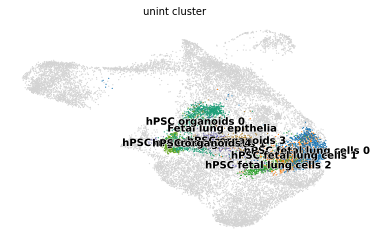

In [16]:
scv.pl.umap(integrated, color='unint_cluster', palette=non_int_palette)

In [17]:
degs = pd.read_excel('../Wong_Fetal_Lung_Dataset_August_2023.xlsx', 
                     sheet_name='Epithelial')

In [18]:
sc.pp.scale(integrated)

In [19]:
# compute celltype scores
for x in degs.columns.values:
    sc.tl.score_genes(integrated, gene_list = list(degs[x].values[:100]), 
                  score_name = x+" score")

In [20]:
scores = []
for x in integrated.obs.cell_type.cat.categories[:-2]:
    if x=='PNEC':
        scores.append('PNEC '+" score")
    elif x != 'Stromal-like cells 1':
        scores.append(x+" score")

In [21]:
# normalize scores so that cells within their own type have median score 1
for ct in integrated.obs.cell_type.unique():
    if ct != 'hPSC fetal lung cells' and ct != 'hPSC organoids' and ct != 'Stromal-like cells 1':
        if ct == 'PNEC':
            ct_ = 'PNEC '
        else:
            ct_ = ct
        integrated.obs[ct_+' score'] = integrated.obs[ct_+' score']/np.median(integrated[integrated.obs.cell_type==ct].obs[ct_+' score'])

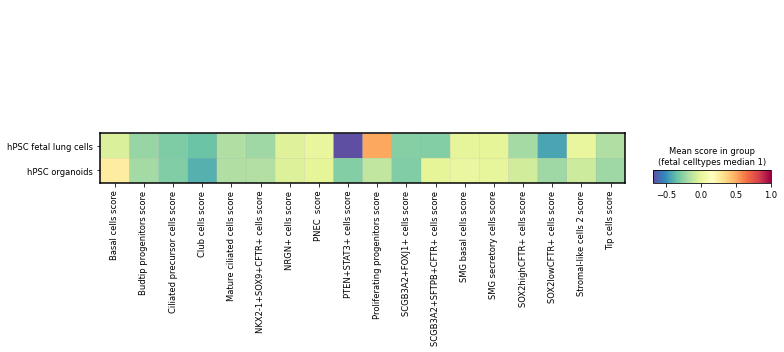

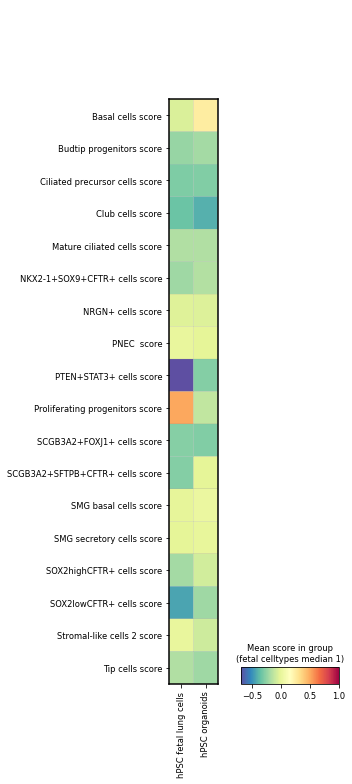

In [22]:
import matplotlib.pyplot as plt
fig,ax=plt.subplots(figsize=(11,5))
sc.pl.matrixplot(integrated[integrated.obs.batch_!='0'], groupby='cell_type', var_names=scores,
                    colorbar_title='Mean score in group\n(fetal celltypes median 1)',
                ax=ax,show=False, cmap='Spectral_r',vmax=1)#, cmap='inferno')#,
#                save='Intrated_celltype_scores_heatmap.pdf')
#ax.tick_params(axis="x", rotation=45)
plt.tight_layout()
plt.savefig('figures/Integrated_celltype_scores_horizontal.pdf')
plt.show()
fig,ax=plt.subplots(figsize=(5,11))
sc.pl.matrixplot(integrated[integrated.obs.batch_!='0'], groupby='cell_type', var_names=scores,
                    colorbar_title='Mean score in group\n(fetal celltypes median 1)', swap_axes=True,
                ax=ax,show=False, cmap='Spectral_r', vmax=1)
#plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('figures/Integrated_celltype_scores_vertical.pdf')
plt.show()

In [26]:
import rpy2.rinterface_lib.callbacks
import logging
import rpy2.robjects as ro

from rpy2.robjects import pandas2ri
import anndata2ri
from rpy2.robjects.conversion import localconverter

pandas2ri.activate()
anndata2ri.activate()
%load_ext rpy2.ipython

In [27]:
%%R
library(anndata)
library(slingshot)
library(Matrix)
library(tradeSeq)


    consider that it could be called from a Python process. This
    results in a quasi-obligatory segfault when rpy2 is evaluating
    R code using it. On the hand, rpy2 is accounting for the
    fact that it might already be running embedded in a Python
    process. This is why:
    - Python -> rpy2 -> R -> reticulate: crashes
    - R -> reticulate -> Python -> rpy2: works

    The issue with reticulate is tracked here:
    https://github.com/rstudio/reticulate/issues/208
    

R[write to console]: Loading required package: princurve

R[write to console]: Loading required package: TrajectoryUtils

R[write to console]: Loading required package: SingleCellExperiment

R[write to console]: Loading required package: SummarizedExperiment

R[write to console]: Loading required package: MatrixGenerics

R[write to console]: Loading required package: matrixStats

R[write to console]: 
Attaching package: ‘MatrixGenerics’


R[write to console]: The following objects are masked from ‘package:matrixStats’:

    colAlls, colAnyNAs, colAnys, colAvgsPerRowSet, colCollapse,
    colCounts, colCummaxs, colCummins, colCumprods, colCumsums,
    colDiffs, colIQRDiffs, colIQRs, colLogSumExps, colMadDiffs,
    colMads, colMaxs, colMeans2, colMedians, colMins, colOrderStats,
    colProds, colQuantiles, colRanges, colRanks, colSdDiffs, colSds,
    colSums2, colTabulates, colVarDiffs, colVars, colWeightedMads,
    colWeightedMeans, colWeightedMedians, colWeightedSds,
    colWeightedVars

In [28]:
cells = ['Budtip progenitors', 'Tip cells', 
         'SCGB3A2+SFTPB+CFTR+ cells',
        'SOX2highCFTR+ cells','NKX2-1+SOX9+CFTR+ cells',
        ]
selected = integrated[integrated.obs.cell_type.isin(cells)]

In [29]:
sc.pp.highly_variable_genes(selected, n_top_genes = 3000, flavor='cell_ranger', batch_key='batch_', subset=True)
scv.pp.pca(selected)

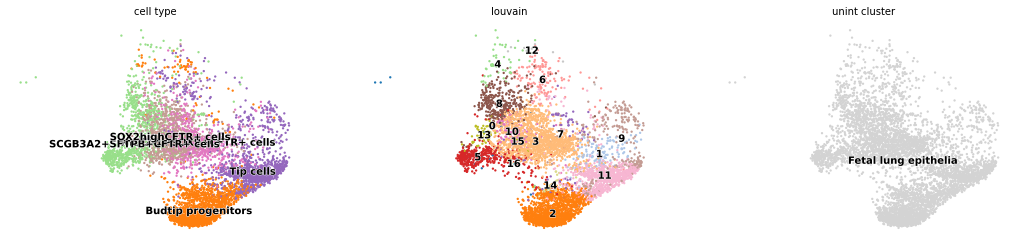

In [30]:
scv.pl.umap(selected, color=['cell_type', 'louvain', 'unint_cluster'],
           legend_loc='on data')

In [31]:
dimred = selected.obsm['X_pca'][:,:30]
clustering = selected.obs['cell_type']

In [32]:
%%R -i dimred -i clustering
# trajectory analysis
set.seed(1)

sds <- slingshot(data = dimred, clusterLabels = clustering, start.clus='Budtip progenitors',
                 approx_points = 300, thresh = 0.01, allow.breaks = TRUE, shrink = 0.99)

sds <- as.SlingshotDataSet(sds)

pseudotime <- slingPseudotime(sds)
write.csv(pseudotime, 'data/no_hPSC_pseudotimes_cftr.csv')

In [33]:
import pandas as pd
pst = pd.read_csv('data/no_hPSC_pseudotimes_cftr.csv', index_col=0)
pst

,Lineage1
Cell-1,24.315440
Cell-2,22.840344
Cell-3,31.504240
Cell-4,31.181707
Cell-5,31.069547
...,...
Cell-5512,20.671520
Cell-5513,20.043202
Cell-5514,26.549727
Cell-5515,25.995826


In [34]:
selected.obs['pseudotime1'] = pst.Lineage1.values

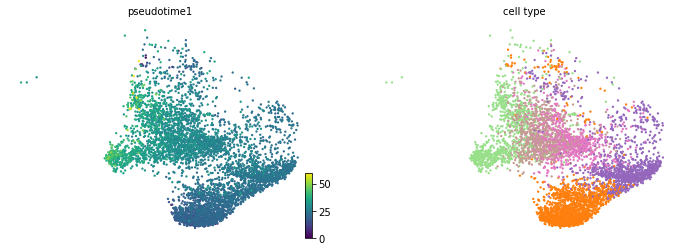

In [35]:
scv.pl.umap(selected, color=['pseudotime1', 'cell_type'])

In [36]:
# sufficiently large clusters along trajectory
TP_clusters, TP_clusters_count = np.unique(selected[~selected.obs.pseudotime1.isnull()].obs.louvain.values, return_counts=True)

In [37]:
involved_louvain_TP = TP_clusters[TP_clusters_count > 100]
involved_louvain_TP

array(['1', '10', '11', '2', '3', '5', '6', '8', '9'], dtype=object)

In [38]:
pseudotime1 = []
pseudotime2 = []
for i in range(integrated.shape[0]):
    index = integrated[i].obs.index.values[0]
    if index in selected[~selected.obs.pseudotime1.isnull()].obs.index:
        pseudotime1.append(selected.obs.loc[index].pseudotime1)
    else:
        pseudotime1.append(np.nan)

In [39]:
integrated.obs['pseudotime1'] = pseudotime1

In [40]:
epi_palette =  {'Basal cells':'#1f77b4', 'Budtip progenitors':'#ff7f0e', 'Ciliated precursor cells':'#2ca02c', 'Club cells':'#d62728', 'Tip cells':'#9467bd', 'Mature ciliated cells':'#8c564b', 'NKX2-1+SOX9+CFTR+ cells':'#e377c2', 'NRGN+ cells':'#7f7f7f', 'PNEC':'#bcbd22', 'PTEN+STAT3+ cells':'#17becf', 'Proliferating progenitors':'#aec7e8', 'SCGB3A2+FOXJ1+ cells':'#ffbb78', 'SCGB3A2+SFTPB+CFTR+ cells':'#98df8a', 'SMG basal cells':'#ff9896', 'SMG secretory cells':'#c5b0d5', 'SOX2lowCFTR+ cells': '#f7b6d2', 'SOX2highCFTR+ cells': '#c49c94', 'Stromal-like cells 1':'#c7c7c7', 'Stromal-like cells 2':'#dbdb8d',
               'hPSC fetal lung cells':'#a55194', 'hPSC organoids': '#8ca252'} 

saving figure to file figures/TP_trajectory_hPSC.pdf


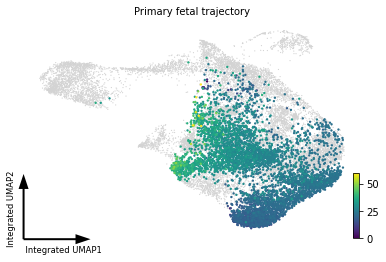

In [41]:
fig,ax=plt.subplots()
scv.pl.umap(integrated, color='#D3D3D3', ax=ax, show=False)
scv.pl.umap(selected, color='pseudotime1',ax=ax, show=True,frameon='artist',
            xlabel='       Integrated UMAP1',ylabel='Integrated UMAP2',
           title='Primary fetal trajectory',
           save='figures/TP_trajectory_hPSC.pdf')

In [42]:
selected.obs[['UMAP1', 'UMAP2', 'pseudotime1', 'cell_type', 'louvain']].to_csv('data/no_hPSC_fetal_trajectory.csv')

saving figure to file figures/TP_trajectory_integrated_clusters_hPSC.pdf


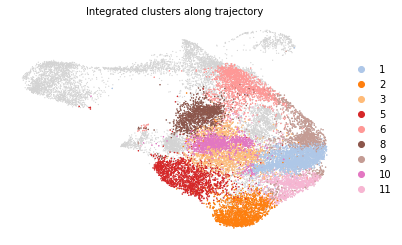

In [43]:
fig,ax=plt.subplots()
scv.pl.umap(integrated, color='#D3D3D3', ax=ax, show=False)
scv.pl.umap(integrated[integrated.obs.louvain.isin(involved_louvain_TP)], 
            color='louvain',ax=ax, show=True,legend_loc='right',
           title='Integrated clusters along trajectory',
           save='figures/TP_trajectory_integrated_clusters_hPSC.pdf')

saving figure to file figures/TP_trajectory_integrated_clusters_hPSC_unint_clusters.pdf


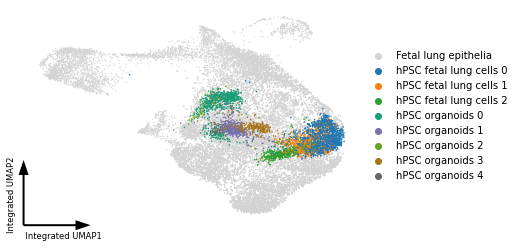

In [44]:
fig,ax=plt.subplots()
scv.pl.umap(integrated, color='#D3D3D3', ax=ax, show=False)
scv.pl.umap(integrated[integrated.obs.louvain.isin(involved_louvain_TP)], 
            color='unint_cluster',ax=ax, show=True,legend_loc='right',frameon='artist',
            xlabel='       Integrated UMAP1',ylabel='Integrated UMAP2',
           title='', #Clusters along trajectory
           save='figures/TP_trajectory_integrated_clusters_hPSC_unint_clusters.pdf')

saving figure to file figures/TP_trajectory_integrated_clusters_hPSC_trajectory_clusters.pdf


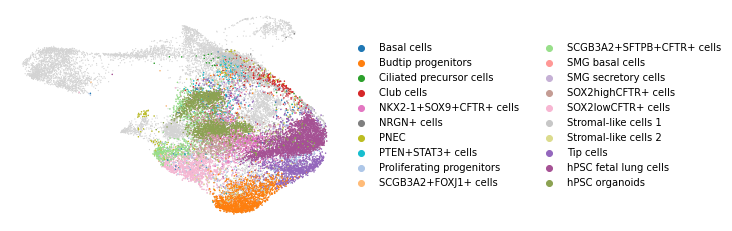

In [45]:
fig,ax=plt.subplots()
scv.pl.umap(integrated, color='#D3D3D3', ax=ax, show=False)
scv.pl.umap(integrated[(integrated.obs.louvain.isin(involved_louvain_TP))], 
            color='cell_type',ax=ax, show=True,legend_loc='right',
           title='',
           save='figures/TP_trajectory_integrated_clusters_hPSC_trajectory_clusters.pdf')

In [47]:
# select clusters involved along trajectory that overlap with hPSC
louvain_TP_S3 = []
for louv in integrated[((integrated.obs.louvain.isin(involved_louvain_TP)) & (integrated.obs.batch_=='1'))].obs.louvain.unique():
    if np.sum(integrated[((integrated.obs.louvain.isin(involved_louvain_TP)) & (integrated.obs.batch_=='1'))].obs.louvain==louv) > 50:
        louvain_TP_S3.append(louv)
        print(louv, np.sum(integrated[((integrated.obs.louvain.isin(involved_louvain_TP)) & (integrated.obs.batch_=='1'))].obs.louvain==louv))
        
louvain_TP_org = []
for louv in integrated[((integrated.obs.louvain.isin(involved_louvain_TP)) & (integrated.obs.batch_=='2'))].obs.louvain.unique():
    if np.sum(integrated[((integrated.obs.louvain.isin(involved_louvain_TP)) & (integrated.obs.batch_=='2'))].obs.louvain==louv) > 50:
        louvain_TP_org.append(louv)
        print(louv, np.sum(integrated[((integrated.obs.louvain.isin(involved_louvain_TP)) & (integrated.obs.batch_=='2'))].obs.louvain==louv))

1 1756
10 76
9 501
10 783
8 706


saving figure to file figures/TP_trajectory_integrated_clusters_hPSC_fetal_lung.pdf


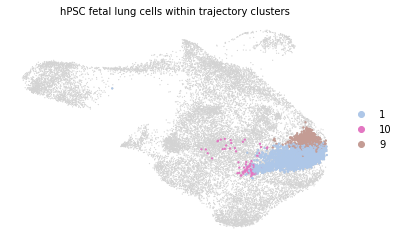

saving figure to file figures/TP_trajectory_integrated_clusters_hPSC_organoids.pdf


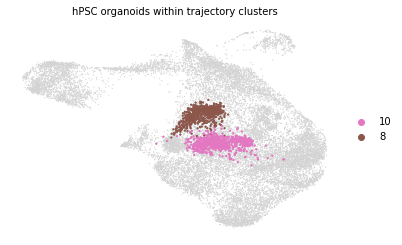

saving figure to file figures/TP_trajectory_integrated_clusters_hPSC_both.pdf


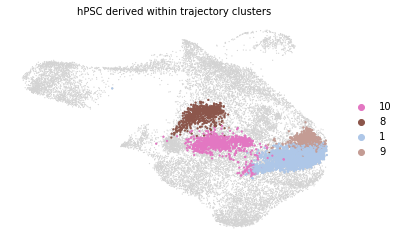

In [48]:
fig,ax=plt.subplots()
scv.pl.umap(integrated, color='#D3D3D3', ax=ax, show=False)
scv.pl.umap(integrated[((integrated.obs.louvain.isin(involved_louvain_TP)) & (integrated.obs.batch_=='1'))],
            color=['louvain'], legend_loc='right', groups=louvain_TP_S3, show=True,ax=ax,
            title='hPSC fetal lung cells within trajectory clusters',size=20,
            save='figures/TP_trajectory_integrated_clusters_hPSC_fetal_lung.pdf'
           )

fig,ax=plt.subplots()
scv.pl.umap(integrated, color='#D3D3D3', ax=ax, show=False)
scv.pl.umap(integrated[((integrated.obs.louvain.isin(involved_louvain_TP)) & (integrated.obs.batch_=='2'))],
            color=['louvain'], legend_loc='right', groups=louvain_TP_org, show=True,ax=ax,
            title='hPSC organoids within trajectory clusters',size=20,
            save='figures/TP_trajectory_integrated_clusters_hPSC_organoids.pdf'
           )

fig,ax=plt.subplots()
scv.pl.umap(integrated, color='#D3D3D3', ax=ax, show=False)
scv.pl.umap(integrated[((integrated.obs.louvain.isin(involved_louvain_TP)) & (integrated.obs.batch_!='0'))],
            color=['louvain'], legend_loc='right', groups=louvain_TP_org+louvain_TP_S3, show=True,ax=ax,
            title='hPSC derived within trajectory clusters',size=20,
            save='figures/TP_trajectory_integrated_clusters_hPSC_both.pdf'
           )

In [49]:
#avg pseudotime of clusters along trajectory for organoids
avg_pseudotime1 = {}
for louv in integrated[integrated.obs.louvain.isin(louvain_TP_org)].obs.louvain.unique():
    avg_pseudotime1[louv] = np.nanmean(integrated[integrated.obs.louvain == louv].obs.pseudotime1.values)
print(avg_pseudotime1)

{'10': 28.74040702065417, '8': 33.16907110759779}


In [50]:
#avg pseudotime of clusters along trajectory for hPSC fetal lung
avg_pseudotime1_S3 = {}
for louv in integrated[integrated.obs.louvain.isin(louvain_TP_S3)].obs.louvain.unique():
    avg_pseudotime1_S3[louv] = np.nanmean(integrated[integrated.obs.louvain == louv].obs.pseudotime1.values)
print(avg_pseudotime1_S3)

{'10': 28.74040702065417, '1': 24.48910928699315, '9': 23.536264517329137}


In [51]:
orderd_integrated_org = integrated[((integrated.obs.louvain.isin(louvain_TP_org)) & (integrated.obs.batch_=='2'))]
orderd_integrated_S3 = integrated[((integrated.obs.louvain.isin(louvain_TP_S3)) & (integrated.obs.batch_=='1'))]
orderd_integrated_org.obs['louvain']  = orderd_integrated_org.obs['louvain'].cat.reorder_categories(['10', '8'])

In [52]:
orderd_integrated_org = orderd_integrated_S3.concatenate(orderd_integrated_org)

In [53]:
avg_pseudotime_union = {**avg_pseudotime1_S3, **avg_pseudotime1}

In [54]:
avg_time = []
for i in range(orderd_integrated_org.shape[0]):
    avg_time.append(avg_pseudotime_union[orderd_integrated_org.obs.iloc[i].louvain])
orderd_integrated_org.obs['avg_time'] = np.array(avg_time)

In [55]:
unint_cluster2 = []
for i in range(len(orderd_integrated_org)):
    idx = orderd_integrated_org.obs.iloc[i].unint_cluster
    unint_cluster2.append(str(idx.split(' ')[-1]))

In [56]:
orderd_integrated_org.obs['unint_cluster2'] = unint_cluster2

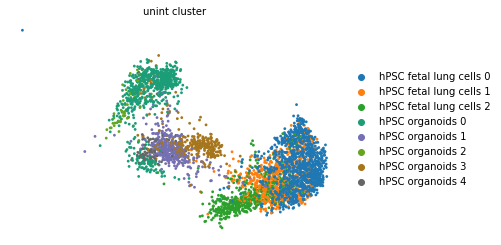

In [57]:
scv.pl.umap(orderd_integrated_org, color='unint_cluster', palette=non_int_palette, legend_loc='right')

In [58]:
# ordering of clusters
orderd_integrated_org.obs.groupby(['cell_type','unint_cluster2']).avg_time.mean()

cell_type              unint_cluster2
hPSC fetal lung cells  0                 24.175990
                       1                 24.411420
                       2                 24.919951
                       3                       NaN
                       4                       NaN
hPSC organoids         0                 32.529949
                       1                 29.109462
                       2                 33.087059
                       3                 29.164880
                       4                 29.092687
Name: avg_time, dtype: float64

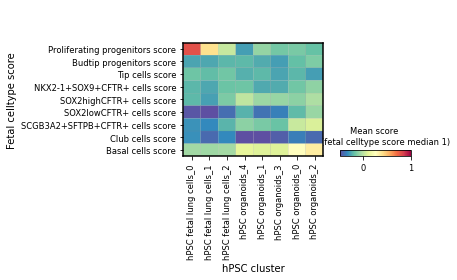

In [60]:
# celltype scores along trajectory
fig,ax=plt.subplots()
g = sc.pl.matrixplot(orderd_integrated_org,
             var_names=[
                 'Proliferating progenitors score', 
                 'Budtip progenitors score',
                 'Tip cells score', 
                 'NKX2-1+SOX9+CFTR+ cells score',
                 'SOX2highCFTR+ cells score',
                 'SOX2lowCFTR+ cells score',
                  'SCGB3A2+SFTPB+CFTR+ cells score', 
             'Club cells score','Basal cells score'], 
                     cmap='Spectral_r',
            groupby=['cell_type','unint_cluster2'], swap_axes=True, show=False,  
                    colorbar_title = 'Mean score \n        (fetal celltype score median 1)',ax=ax, vmax=1,
                    categories_order=['hPSC fetal lung cells_0','hPSC fetal lung cells_1',
                                      'hPSC fetal lung cells_2',
                                      'hPSC organoids_4', 'hPSC organoids_1', 'hPSC organoids_3'
                                     , 'hPSC organoids_0', 'hPSC organoids_2'])

g['mainplot_ax'].set_xlabel('hPSC cluster')
g['mainplot_ax'].set_ylabel('Fetal celltype score')
plt.tight_layout()
plt.savefig('figures/Non_Integrated_cell_scores_vs_pseudotime_realscale.pdf')
plt.show()

In [61]:
orderd_integrated_org.obs[[
                 'Proliferating progenitors score', 
                 'Budtip progenitors score',
                 'Tip cells score', 
                 'NKX2-1+SOX9+CFTR+ cells score',
                 'SOX2highCFTR+ cells score',
                 'SOX2lowCFTR+ cells score',
                  'SCGB3A2+SFTPB+CFTR+ cells score', 
             'Club cells score','Basal cells score','cell_type','unint_cluster']].to_csv('data/hPSC_trajectory_scores.csv')

In [62]:
# find genes along trajectory
import scFates as scf

In [63]:
orderd_integrated_org.obs['t'] = orderd_integrated_org.obs.avg_time
orderd_integrated_org.obs['seg'] = 1

In [64]:
scf.tl.test_association(orderd_integrated_org, n_jobs=4, spline_df=1)

test features for association with the trajectory
    single mapping : 100%|██████████| 22213/22213 [04:29<00:00, 82.40it/s]
    found 547 significant features (0:04:29) --> added
    .var['p_val'] values from statistical test.
    .var['fdr'] corrected values from multiple testing.
    .var['st'] proportion of mapping in which feature is significant.
    .var['A'] amplitue of change of tested feature.
    .var['signi'] feature is significantly changing along pseudotime.
    .uns['stat_assoc_list'] list of fitted features on the graph for all mappings.


In [65]:
scf.tl.test_association(orderd_integrated_org,reapply_filters=True,fdr_cut=0.0001)

reapplied filters, 547 significant features


In [66]:
orderd_integrated_org.layers['spliced'] = orderd_integrated_org.X.copy()
orderd_integrated_org.layers['unspliced'] = orderd_integrated_org.X.copy()
scv.pp.neighbors(orderd_integrated_org, n_pcs=30, n_neighbors=30)
scv.pp.moments(orderd_integrated_org, n_pcs=None, n_neighbors=None)

computing neighbors
    finished (0:00:06) --> added 
    'distances' and 'connectivities', weighted adjacency matrices (adata.obsp)
computing moments based on connectivities
    finished (0:00:14) --> added 
    'Ms' and 'Mu', moments of un/spliced abundances (adata.layers)


In [67]:
orderd_integrated_S3.layers['spliced'] = orderd_integrated_S3.X.copy()
orderd_integrated_S3.layers['unspliced'] = orderd_integrated_S3.X.copy()
scv.pp.neighbors(orderd_integrated_S3, n_pcs=30, n_neighbors=30)
scv.pp.moments(orderd_integrated_S3, n_pcs=None, n_neighbors=None)

computing neighbors
    finished (0:00:00) --> added 
    'distances' and 'connectivities', weighted adjacency matrices (adata.obsp)
computing moments based on connectivities
    finished (0:00:08) --> added 
    'Ms' and 'Mu', moments of un/spliced abundances (adata.layers)


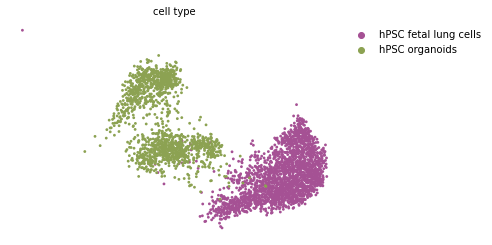

In [69]:
scv.pl.umap(orderd_integrated_org, color='cell_type', palette=epi_palette)

In [70]:
orderd_integrated_both = orderd_integrated_org.concatenate(orderd_integrated_S3)

In [71]:
t = []
for i in range(orderd_integrated_org.shape[0]):
    if orderd_integrated_org[i].obs.cell_type.values[0] == 'hPSC organoids':
        t.append(orderd_integrated_org[i].obs.avg_time.values[0])
    else: #before organoids
        t.append(-100 +orderd_integrated_org[i].obs.avg_time.values[0])

In [73]:
orderd_integrated_org.obs['new_t'] = t

In [76]:
import gc
gc.collect()

98

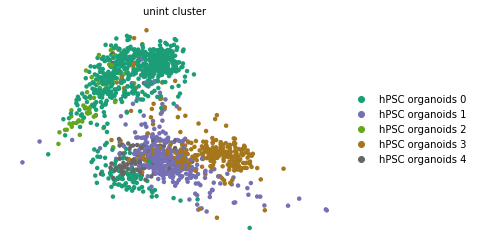

In [77]:
scv.pl.umap(orderd_integrated_org[orderd_integrated_org.obs.batch_=='2'], color='unint_cluster', palette=non_int_palette,
           legend_loc='right')

In [78]:
gc.collect()

4595

In [82]:
# genes expressed in hPSC and in celltype DEG lists
selected_genes  = {'Budtip progenitors': ['CCN2', 'ERRFI1', 'THBS1'],
 'Mature ciliated cells': ['CAPS', 'PIFO'],
 'Early AT2-like cells': ['ETV5', 'NPC2', 'TPD52L1'],
 'Proliferating progenitors': ['TOP2A', 'CENPF', 'NUSAP1'],
 'SOX2lowCFTR+ cells': ['GPRC5A', 'PCP4', 'ANOS1'],
 'SOX2highCFTR+ cells': ['MECOM', 'DMD', 'ANXA3'],
 'PTEN+STAT3+ cells': ['KCNQ1OT1', 'VMP1', 'SYNE1'],
 'SCGB3A2+SFTPB+CFTR+ cells': ['CP', 'CYB5A', 'NPNT'],
 'Ciliated precursor cells': ['DYNLL1', 'TPPP3', 'CRIP1'],
 'NKX2-1+SOX9+CFTR+ cells': ['CLDN18', 'SMARCA5', 'CLIC3'],
 'PNEC ': ['PCSK1N', 'SEC11C', 'BEX1'],
 'SCGB3A2+FOXJ1+ cells': ['LRRIQ1', 'HYDIN', 'CCDC146'],
 'Stromal-like cells 2': ['ZEB2', 'PIEZO2', 'CCBE1'],
 'SMG basal cells': ['TIMP3', 'LUM', 'DKK1'],
 'Club cells': ['TMSB4X', 'S100A11', 'VIM'],
 'NRGN+ cells': ['RGS10', 'GNG11', 'PRKAR2B'],
 'SMG secretory cells': ['TM4SF1', 'TFPI2', 'HHIP'],
 'Basal cells': ['KRT5', 'SPRR3', 'TFAP2A']}

In [100]:
#output data
pd.DataFrame(orderd_integrated_org[np.argsort(orderd_integrated_org.obs['new_t']),list(orderd_integrated_org[:,orderd_integrated_org.var.fdr< 0.01].var_names)].layers['Ms'],
             index=orderd_integrated_org.obs['new_t'],
            columns=list(orderd_integrated_org[:,orderd_integrated_org.var.fdr< 0.01].var_names)).round(decimals=3).to_csv('data/hPSC_trajectory_heatmap.csv')
gc.collect()

/usr/lib/python3/dist-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


0

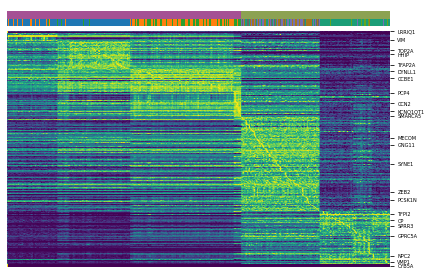

In [83]:
#trajectory heatmap
gc.collect()
g = scv.pl.heatmap(orderd_integrated_org, sortby='new_t', 
               var_names=list(orderd_integrated_org[:,orderd_integrated_org.var.fdr< 0.01].var_names),
                                                  col_color=['cell_type','unint_cluster'], yticklabels=True, show=False, sort=True,
                   n_convolve=15,
                  figsize=(7,4), rasterized=True)


yticklabels = []
yticks = []
for x in g.ax_heatmap.get_yticklabels():
    if x.get_text() in np.concatenate(list(selected_genes.values())):
        if len(yticks) ==0 or (np.abs(np.array(yticks) - x.get_position()[1])).min() > 125:
            yticklabels.append(x.get_text())
            yticks.append(x.get_position()[1])


g.ax_heatmap.set(yticks=yticks, yticklabels=yticklabels)
g.ax_heatmap.tick_params(labelsize=5)
plt.savefig('figures/hPSC_trajectory_heatmap_both.pdf')
plt.show()